# Libaries

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import re
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import requests
from io import StringIO
import time
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from scipy.spatial.distance import pdist, squareform
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Removing column display limits

In [221]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Dataset

## Outcome dataset

In [222]:
df_outcome = pd.read_csv('Austin_Animal_Center_Outcomes_20250227.csv')

In [223]:
df_outcome.head()

Animal ID       Name                DateTime MonthYear Date of Birth  \
0   A882831  *Hamilton  07/01/2023 06:12:00 PM  Jul 2023    03/25/2023   
1   A794011      Chunk  05/08/2019 06:20:00 PM  May 2019    05/02/2017   
2   A776359      Gizmo  07/18/2018 04:02:00 PM  Jul 2018    07/12/2017   
3   A821648        NaN  08/16/2020 11:38:00 AM  Aug 2020    08/16/2019   
4   A720371      Moose  02/13/2016 05:59:00 PM  Feb 2016    10/08/2015   

  Outcome Type Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
0     Adoption             NaN         Cat    Neutered Male         3 months   
1    Rto-Adopt             NaN         Cat    Neutered Male          2 years   
2     Adoption             NaN         Dog    Neutered Male           1 year   
3   Euthanasia             NaN       Other          Unknown           1 year   
4     Adoption             NaN         Dog    Neutered Male         4 months   

                                Breed              Color  
0              Domestic Shorthair Mix        Black/White  
1              Domestic Shorthair Mix  Brown Tabby/White  
2             Chihuahua Shorthair Mix        White/Brown  
3                             Raccoon               Gray  
4  Anatol Shepherd/Labrador Retriever               Buff

In [224]:
df_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171860 entries, 0 to 171859
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         171860 non-null  object
 1   Name              122679 non-null  object
 2   DateTime          171860 non-null  object
 3   MonthYear         171860 non-null  object
 4   Date of Birth     171860 non-null  object
 5   Outcome Type      171818 non-null  object
 6   Outcome Subtype   78729 non-null   object
 7   Animal Type       171860 non-null  object
 8   Sex upon Outcome  171858 non-null  object
 9   Age upon Outcome  171848 non-null  object
 10  Breed             171860 non-null  object
 11  Color             171860 non-null  object
dtypes: object(12)
memory usage: 15.7+ MB


## Intake dataset

In [225]:
df_intake = pd.read_csv('Austin_Animal_Center_Intakes_20250227.csv')

In [226]:
df_intake.head()

Animal ID          Name                DateTime     MonthYear  \
0   A786884        *Brock  01/03/2019 04:19:00 PM  January 2019   
1   A706918         Belle  07/05/2015 12:59:00 PM     July 2015   
2   A724273       Runster  04/14/2016 06:43:00 PM    April 2016   
3   A665644           NaN  10/21/2013 07:59:00 AM  October 2013   
4   A857105  Johnny Ringo  05/12/2022 12:23:00 AM      May 2022   

                        Found Location    Intake Type Intake Condition  \
0  2501 Magin Meadow Dr in Austin (TX)          Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)          Stray           Normal   
2   2818 Palomino Trail in Austin (TX)          Stray           Normal   
3                          Austin (TX)          Stray             Sick   
4   4404 Sarasota Drive in Austin (TX)  Public Assist           Normal   

  Animal Type Sex upon Intake Age upon Intake                     Breed  \
0         Dog   Neutered Male         2 years                Beagle Mix   
1         Dog   Spayed Female         8 years  English Springer Spaniel   
2         Dog     Intact Male       11 months               Basenji Mix   
3         Cat   Intact Female         4 weeks    Domestic Shorthair Mix   
4         Cat   Neutered Male         2 years        Domestic Shorthair   

          Color  
0      Tricolor  
1   White/Liver  
2   Sable/White  
3        Calico  
4  Orange Tabby

In [227]:
df_intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171731 entries, 0 to 171730
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         171731 non-null  object
 1   Name              122432 non-null  object
 2   DateTime          171731 non-null  object
 3   MonthYear         171731 non-null  object
 4   Found Location    171731 non-null  object
 5   Intake Type       171731 non-null  object
 6   Intake Condition  171731 non-null  object
 7   Animal Type       171731 non-null  object
 8   Sex upon Intake   171729 non-null  object
 9   Age upon Intake   171730 non-null  object
 10  Breed             171731 non-null  object
 11  Color             171731 non-null  object
dtypes: object(12)
memory usage: 15.7+ MB


## Tranformed dataset

In [228]:
#df = pd.read_csv('data_transformed.csv')

In [229]:
#df.head()

## Merged dataset between intake & outcome

In [230]:
print("Duplicate animal_id count in intake:", df_intake['Animal ID'].duplicated().sum())
print("Duplicate animal_id count in outcome:", df_outcome['Animal ID'].duplicated().sum())


Duplicate animal_id count in intake: 17351
Duplicate animal_id count in outcome: 17360


In [231]:
# Ensure the DateTime columns are in datetime format
df_intake['DateTime'] = pd.to_datetime(df_intake['DateTime'])
df_outcome['DateTime'] = pd.to_datetime(df_outcome['DateTime'])

/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_36400/1441597359.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_intake['DateTime'] = pd.to_datetime(df_intake['DateTime'])
/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_36400/1441597359.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_outcome['DateTime'] = pd.to_datetime(df_outcome['DateTime'])


In [232]:
# Sort each dataframe by DateTime in descending order and drop duplicates on 'Animal Id'
df_intake = df_intake.sort_values(by='DateTime', ascending=False).drop_duplicates(subset=['Animal ID'], keep='first')
df_outcome = df_outcome.sort_values(by='DateTime', ascending=False).drop_duplicates(subset=['Animal ID'], keep='first')

In [233]:
df = df_intake.merge(df_outcome, on='Animal ID', how = 'inner')

In [234]:
df.head(10)

Animal ID     Name_x          DateTime_x    MonthYear_x  \
0   A912256     Yarrow 2025-02-27 14:22:00  February 2025   
1   A921540  *Pricilla 2025-02-27 13:46:00  February 2025   
2   A925674    Unknown 2025-02-27 13:46:00  February 2025   
3   A871344     Shotty 2025-02-27 13:40:00  February 2025   
4   A853027      Ellie 2025-02-27 13:04:00  February 2025   
5   A892261       Luca 2025-02-27 10:46:00  February 2025   
6   A925628        NaN 2025-02-27 09:32:00  February 2025   
7   A924670   *Redford 2025-02-27 08:19:00  February 2025   
8   A923185  Hashbrown 2025-02-26 18:23:00  February 2025   
9   A925607        NaN 2025-02-26 17:09:00  February 2025   

                                                      Found Location  \
0                                  3414 Hollywood Ave in Austin (TX)   
1                                                        Austin (TX)   
2  Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)   
3                                         1506 E 13Th in Austin (TX)   
4                                                        Austin (TX)   
5                                                        Austin (TX)   
6                                      611 S Congress in Austin (TX)   
7                                    3804 Hudson Bend in Austin (TX)   
8                                                        Austin (TX)   
9                                           2215 Post in Austin (TX)   

       Intake Type Intake Condition Animal Type_x Sex upon Intake  \
0  Owner Surrender         Behavior           Dog   Neutered Male   
1  Owner Surrender           Normal           Dog   Spayed Female   
2         Wildlife           Normal         Other         Unknown   
3    Public Assist          Unknown           Dog     Intact Male   
4  Owner Surrender             Sick           Dog   Spayed Female   
5  Owner Surrender           Normal           Dog   Neutered Male   
6         Wildlife             Sick         Other         Unknown   
7            Stray             Sick           Cat   Neutered Male   
8  Owner Surrender           Normal           Dog   Neutered Male   
9         Wildlife             Sick         Other         Unknown   

  Age upon Intake                            Breed_x              Color_x  \
0        7 months  Labrador Retriever/Siberian Husky          Cream/White   
1        3 months             Labrador Retriever Mix            White/Tan   
2         2 years                                Bat                Black   
3         3 years                       Pit Bull Mix           Fawn/White   
4         5 years                Pit Bull/Great Dane  Brown Brindle/White   
5         2 years             Labrador Retriever Mix          Black/White   
6         2 years                                Bat                Brown   
7         5 years                  Domestic Longhair         White/Orange   
8         2 years                Chihuahua Shorthair          Brown/White   
9         2 years                           Squirrel                Brown   

      Name_y          DateTime_y MonthYear_y Date of Birth     Outcome Type  \
0     Yarrow 2024-09-21 12:11:00    Sep 2024    07/04/2024  Return to Owner   
1  *Pricilla 2025-02-05 16:17:00    Feb 2025    11/26/2024         Adoption   
2    Unknown 2025-02-27 15:20:00    Feb 2025    02/27/2023       Euthanasia   
3     Shotty 2022-12-23 11:47:00    Dec 2022    12/22/2021  Return to Owner   
4      Ellie 2023-02-23 18:15:00    Feb 2023    03/11/2019         Adoption   
5       Luca 2024-01-08 19:04:00    Jan 2024    04/21/2022         Adoption   
6        NaN 2025-02-27 11:22:00    Feb 2025    02/27/2023       Euthanasia   
7   *Redford 2025-02-18 18:22:00    Feb 2025    02/13/2020         Adoption   
8  Hashbrown 2025-02-19 17:03:00    Feb 2025    02/02/2023         Adoption   
9        NaN 2025-02-26 18:22:00    Feb 2025    02/26/2023       Euthanasia   

  Outcome Subtype Animal Type_y Sex upon Outcome Age upon O

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153686 entries, 0 to 153685
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         153686 non-null  object        
 1   Name_x            105028 non-null  object        
 2   DateTime_x        153686 non-null  datetime64[ns]
 3   MonthYear_x       153686 non-null  object        
 4   Found Location    153686 non-null  object        
 5   Intake Type       153686 non-null  object        
 6   Intake Condition  153686 non-null  object        
 7   Animal Type_x     153686 non-null  object        
 8   Sex upon Intake   153684 non-null  object        
 9   Age upon Intake   153685 non-null  object        
 10  Breed_x           153686 non-null  object        
 11  Color_x           153686 non-null  object        
 12  Name_y            105028 non-null  object        
 13  DateTime_y        153686 non-null  datetime64[ns]
 14  Mont

1. Convert datetime_x, datetime2, datetime_y into datetime64
2. Convert 

### Missing matrix

<Axes: >

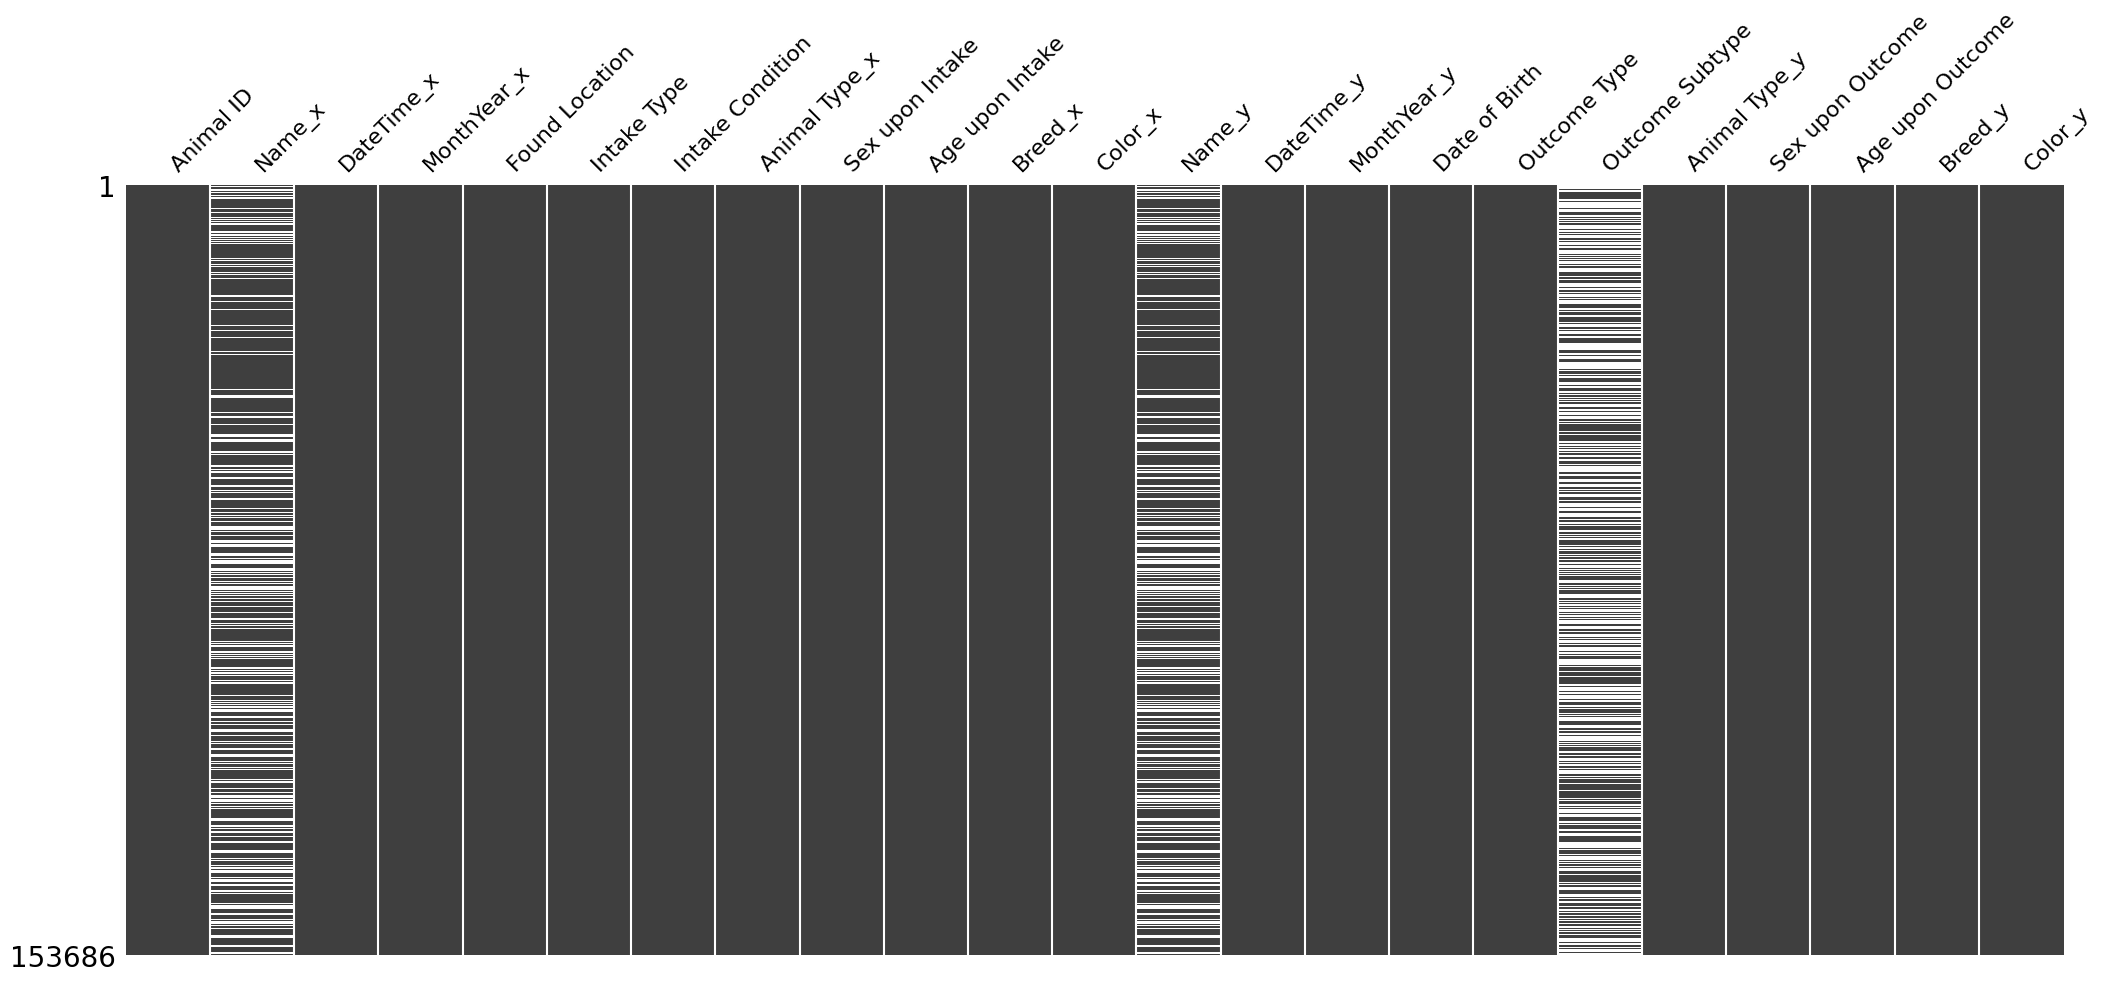

In [236]:
import missingno as msno
msno.matrix(df, labels=True, sparkline=False)

### Dropping columns with duplicating information and repititive information

In [237]:
# Drop outcome_subtype, datetime2, breed_x, color_x, animal_type_x, name_x,, name_y
df = df.drop(columns=['Outcome Subtype', 'MonthYear_x', 'Breed_x', 'Color_x', 'Animal Type_x', 'Name_x', 'Name_y','MonthYear_y' ])

In [238]:
df.head()

Animal ID          DateTime_x  \
0   A912256 2025-02-27 14:22:00   
1   A921540 2025-02-27 13:46:00   
2   A925674 2025-02-27 13:46:00   
3   A871344 2025-02-27 13:40:00   
4   A853027 2025-02-27 13:04:00   

                                                      Found Location  \
0                                  3414 Hollywood Ave in Austin (TX)   
1                                                        Austin (TX)   
2  Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)   
3                                         1506 E 13Th in Austin (TX)   
4                                                        Austin (TX)   

       Intake Type Intake Condition Sex upon Intake Age upon Intake  \
0  Owner Surrender         Behavior   Neutered Male        7 months   
1  Owner Surrender           Normal   Spayed Female        3 months   
2         Wildlife           Normal         Unknown         2 years   
3    Public Assist          Unknown     Intact Male         3 years   
4  Owner Surrender             Sick   Spayed Female         5 years   

           DateTime_y Date of Birth     Outcome Type Animal Type_y  \
0 2024-09-21 12:11:00    07/04/2024  Return to Owner           Dog   
1 2025-02-05 16:17:00    11/26/2024         Adoption           Dog   
2 2025-02-27 15:20:00    02/27/2023       Euthanasia         Other   
3 2022-12-23 11:47:00    12/22/2021  Return to Owner           Dog   
4 2023-02-23 18:15:00    03/11/2019         Adoption           Dog   

  Sex upon Outcome Age upon Outcome                            Breed_y  \
0    Neutered Male         2 months  Labrador Retriever/Siberian Husky   
1    Spayed Female         2 months             Labrador Retriever Mix   
2          Unknown              NaN                                Bat   
3      Intact Male           1 year                       Pit Bull Mix   
4    Spayed Female          3 years                Pit Bull/Great Dane   

               Color_y  
0          Cream/White  
1            White/Tan  
2                Black  
3           Fawn/White  
4  Brown Brindle/White

### Converting into datetime64

In [239]:
# Convert all datetime columns
##datetime_columns = ['DateTime_x', 'DateTime_y', 'Date of Birth']
#df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)

# Display the DataFrame to confirm conversion
#print(df.dtypes)

## A Look at df

In [240]:
df.head()

Animal ID          DateTime_x  \
0   A912256 2025-02-27 14:22:00   
1   A921540 2025-02-27 13:46:00   
2   A925674 2025-02-27 13:46:00   
3   A871344 2025-02-27 13:40:00   
4   A853027 2025-02-27 13:04:00   

                                                      Found Location  \
0                                  3414 Hollywood Ave in Austin (TX)   
1                                                        Austin (TX)   
2  Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)   
3                                         1506 E 13Th in Austin (TX)   
4                                                        Austin (TX)   

       Intake Type Intake Condition Sex upon Intake Age upon Intake  \
0  Owner Surrender         Behavior   Neutered Male        7 months   
1  Owner Surrender           Normal   Spayed Female        3 months   
2         Wildlife           Normal         Unknown         2 years   
3    Public Assist          Unknown     Intact Male         3 years   
4  Owner Surrender             Sick   Spayed Female         5 years   

           DateTime_y Date of Birth     Outcome Type Animal Type_y  \
0 2024-09-21 12:11:00    07/04/2024  Return to Owner           Dog   
1 2025-02-05 16:17:00    11/26/2024         Adoption           Dog   
2 2025-02-27 15:20:00    02/27/2023       Euthanasia         Other   
3 2022-12-23 11:47:00    12/22/2021  Return to Owner           Dog   
4 2023-02-23 18:15:00    03/11/2019         Adoption           Dog   

  Sex upon Outcome Age upon Outcome                            Breed_y  \
0    Neutered Male         2 months  Labrador Retriever/Siberian Husky   
1    Spayed Female         2 months             Labrador Retriever Mix   
2          Unknown              NaN                                Bat   
3      Intact Male           1 year                       Pit Bull Mix   
4    Spayed Female          3 years                Pit Bull/Great Dane   

               Color_y  
0          Cream/White  
1            White/Tan  
2                Black  
3           Fawn/White  
4  Brown Brindle/White

In [241]:
df['time_to_outcome'] = df['DateTime_y'] - df['DateTime_x']
df.rename(columns={'DateTime_x': 'Date_of_Intake'}, inplace=True)
df.rename(columns={'DateTime_y': 'Date_of_Outcome'}, inplace=True)

In [242]:
df.rename(columns={'Animal Type_y': 'animal_type'}, inplace=True)

In [243]:
df.rename(columns = {'Color_y': 'color'}, inplace=True)

In [244]:
df.rename(columns={'Breed_y': 'breed'}, inplace=True)

### Convert time_to_outcome to timedelta format

In [245]:
# Convert time_to_outcome to timedelta format
df['time_to_outcome'] = pd.to_timedelta(df['time_to_outcome'])

# Convert timedelta to total minutes
df['time_to_outcome_minutes'] = df['time_to_outcome'].dt.total_seconds() / 60

# Preliminary EDA before clustering

## Animal Type count

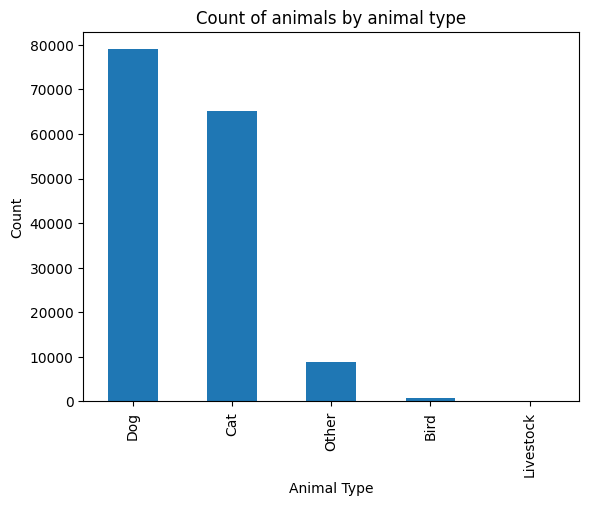

In [246]:
# Bar chart for count of animals by animal_type
df['animal_type'].value_counts().plot(kind='bar')
plt.title('Count of animals by animal type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

## Animal Intake type counts

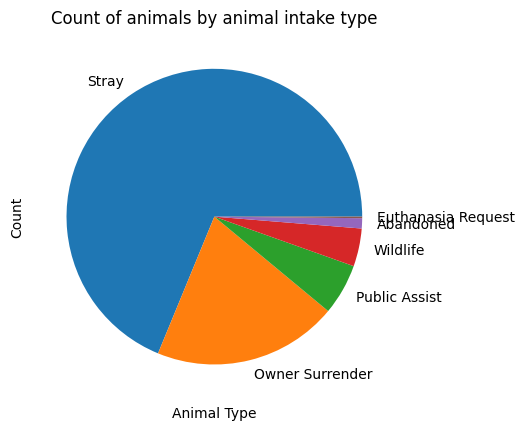

In [247]:
# Bar chart for count of animals by intake_type
df['Intake Type'].value_counts().plot(kind='pie')
plt.title('Count of animals by animal intake type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

## Intake condition

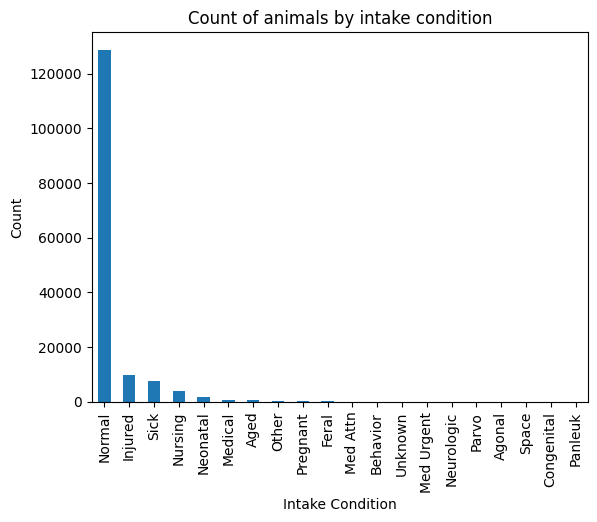

In [248]:
# Bar chart for count of animals by intake condition
df['Intake Condition'].value_counts().plot(kind='bar')
plt.title('Count of animals by intake condition')
plt.xlabel('Intake Condition')
plt.ylabel('Count')
plt.show()


## Found_location fixing

In [249]:
# How many unique values in found_location
# How many unique values in found_location
found_location = df['Found Location'].unique()
print(len(found_location))
print(found_location)

63145
['3414 Hollywood Ave in Austin (TX)' 'Austin (TX)'
 'Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)' ...
 '7405 Springtime in Austin (TX)' 'Abia in Austin (TX)'
 'Norht Ec in Austin (TX)']


In [250]:
# Assuming your data is in a DataFrame called 'df'
unique_locations = df['Found Location'].unique()

# Print the unique locations
print("Unique found locations:")
print(unique_locations)

# If you want to know how many unique locations there are
print(f"\nNumber of unique locations: {len(unique_locations)}")

# If you want to see the count of animals found at each location
location_counts = df['Found Location'].value_counts()
print("\nCount of animals by location:")
print(location_counts)

Unique found locations:
['3414 Hollywood Ave in Austin (TX)' 'Austin (TX)'
 'Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)' ...
 '7405 Springtime in Austin (TX)' 'Abia in Austin (TX)'
 'Norht Ec in Austin (TX)']

Number of unique locations: 63145

Count of animals by location:
Found Location
Austin (TX)                                                                              27439
Travis (TX)                                                                               3363
Outside Jurisdiction                                                                      1775
7201 Levander Loop in Austin (TX)                                                         1425
Manor (TX)                                                                                 657
Pflugerville (TX)                                                                          600
Del Valle (TX)                                                                             471
4434 Frontier Trail in

### Cleaning the found_location variable

In [251]:
def clean_location(location):
    if pd.isna(location):  # Handle missing values
        return location

    # Check if the pattern "in X" exists
    if " in " in location:
        # Extract what comes after "in "
        return location.split(" in ")[1]
    else:
        # Keep the original value for entries that don't match the pattern
        return location

# Apply the function to create a new clean_location column
df['clean_location'] = df['Found Location'].apply(clean_location)

# Let's check the unique values in the new column
unique_clean_locations = df['clean_location'].unique()
print("Sample of cleaned unique locations:")
print(unique_clean_locations[:20])  # Print first 20 unique locations

# Count frequency of each cleaned location
location_counts = df['clean_location'].value_counts()
print("\nTop 10 most common cleaned locations:")
print(location_counts.head(20))

Sample of cleaned unique locations:
['Austin (TX)' 'Travis (TX)' 'Outside Jurisdiction' 'Williamson (TX)'
 'Creedmoor (TX)' 'Manor (TX)' 'Pflugerville (TX)' 'Cedar Park (TX)'
 'Mustang Ridge (TX)' 'Hays (TX)' 'Bastrop (TX)' 'Round Rock (TX)'
 'Lago Vista (TX)' 'Leander (TX)' 'Bee Cave (TX)' 'Caldwell (TX)'
 'Sunset Valley (TX)' 'Lakeway (TX)' 'Jonestown (TX)' 'Webberville (TX)']

Top 10 most common cleaned locations:
clean_location
Austin (TX)             125805
Travis (TX)              17419
Manor (TX)                2911
Del Valle (TX)            2065
Pflugerville (TX)         1916
Outside Jurisdiction      1775
Leander (TX)               354
Lago Vista (TX)            199
Cedar Park (TX)            178
Lakeway (TX)               146
Creedmoor (TX)             140
Jonestown (TX)             119
Round Rock (TX)            112
Hays (TX)                   95
Mustang Ridge (TX)          93
Bastrop (TX)                83
Williamson (TX)             79
Bee Cave (TX)               61
Webber

Massive class imbalances exist here with most pets coming from Austin, and Travis.

## Unique values in age_upon_intake

### Cleaning this data to convert all ages to days

In [252]:
def convert_age_to_days(age_str):
    if pd.isna(age_str):
        return None

    # Convert to lowercase and remove any leading/trailing spaces
    age_str = str(age_str).lower().strip()

    # Extract the number and unit using regex
    match = re.search(r'(\d+\.?\d*)\s*(\w+)', age_str)
    if not match:
        return None

    value = float(match.group(1))
    unit = match.group(2)

    # Handle different units, checking for both singular and plural forms
    if unit in ['day', 'days']:
        return value
    elif unit in ['week', 'weeks']:
        return value * 7
    elif unit in ['month', 'months']:
        return value * 30.44  # Average days in a month
    elif unit in ['year', 'years']:
        return value * 365.25  # Account for leap years
    else:
        return None  # Unknown unit

# Apply the function to your age column
# Assuming your column is named 'age_upon_intake' or 'age_upon_outcome'
df['age_days'] = df['Age upon Intake'].apply(convert_age_to_days)

# Check the results with a few examples
test_examples = pd.DataFrame({
    'Age upon Intake': ['2 days', '1 day', '6 weeks', '1 week', '3 months', '1 month', '5 years', '1 year']
})
test_examples['age_days'] = test_examples['Age upon Intake'].apply(convert_age_to_days)
print(test_examples)

  Age upon Intake  age_days
0          2 days      2.00
1           1 day      1.00
2         6 weeks     42.00
3          1 week      7.00
4        3 months     91.32
5         1 month     30.44
6         5 years   1826.25
7          1 year    365.25


In [253]:
df['age_days'].describe()

count    153685.000000
mean        692.071304
std        1026.245937
min           0.000000
25%          30.440000
50%         365.250000
75%         730.500000
max       10957.500000
Name: age_days, dtype: float64

## Average days for each outcome_type

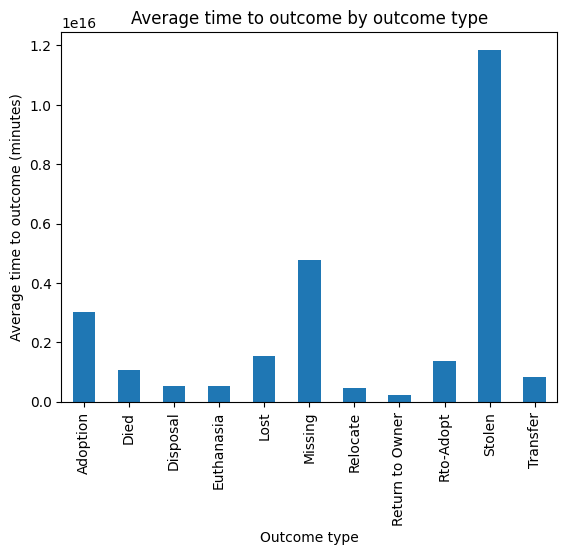

In [254]:
# Plot for average time for outcome_type
df.groupby('Outcome Type')['time_to_outcome'].mean().plot(kind='bar')
plt.title('Average time to outcome by outcome type')
plt.xlabel('Outcome type')
plt.ylabel('Average time to outcome (minutes)')
plt.show()

## Fixing the colour column

In [255]:
def simplify_color(color):
    """
    Simplify the color into broader categories
    """

    # Handle NaN values
    if pd.isna(color):
        return "Unknown"

    # Now it's safe to call lower()
    color = str(color).lower()

    # Black Group
    if any(word in color for word in ['black', 'ebony', 'charcoal']):
        return 'Black'

    # White Group
    elif any(word in color for word in ['white', 'cream', 'ivory', 'pearl', 'platinum']):
        return 'White'

    # Brown Group
    elif any(word in color for word in ['brown', 'brindle', 'chocolate', 'mocha', 'mahogany']):
        return 'Brown'

    # Grey Group
    elif any(word in color for word in ['gray', 'grey', 'blue', 'silver', 'slate', 'pewter', 'ash']):
        return 'Grey'

    # Gold Group
    elif any(word in color for word in ['gold', 'tan', 'yellow', 'fawn', 'buff', 'sandy']):
        return 'Gold'

    # Red Group
    elif any(word in color for word in ['red', 'ginger', 'orange', 'copper', 'auburn']):
        return 'Red'

    # Cream Group
    elif any(word in color for word in ['cream', 'beige', 'off-white']):
        return 'Cream'

    # Tabby Pattern
    elif 'tabby' in color:
        return 'Tabby'

    # Merle Pattern
    elif 'merle' in color:
        return 'Merle'

    # Tricolor Pattern
    elif 'tricolor' in color or ('black' in color and 'tan' in color and 'white' in color):
        return 'Tricolor'

    # Spotted or Speckled Patterns
    elif any(word in color for word in ['spotted', 'speckled', 'ticked', 'roan', 'freckled']):
        return 'Spotted'

    # Mixed or Multiple Colors
    elif '/' in color or 'and' in color:
        return 'Multicolor'

    # Default to Other
    else:
        return 'Other'


In [256]:
# Apply Enhanced Color Grouping
df['color_group'] = df['color'].apply(simplify_color)

In [257]:
df['color_group'].value_counts()

color_group
Black         48535
White         48468
Brown         21074
Other         10963
Grey           8599
Red            6962
Gold           5892
Tricolor       3170
Multicolor       23
Name: count, dtype: int64

## Fixing the outcome column

In [258]:
# Grouping Outcome Types
def group_outcome(outcome):
    if outcome in ['Adoption', 'Return to Owner', 'Rto-Adopt']:
        return 'Positive'
    elif outcome in ['Transfer', 'Relocate']:
        return 'Neutral'
    elif outcome in ['Euthanasia', 'Died', 'Disposal', 'Lost', 'Missing', 'Stolen']:
        return 'Negative'
    else:
        return 'Other'

# Apply Grouping
df['outcome_group'] = df['Outcome Type'].apply(group_outcome)


## Fixing the breed column

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153686 entries, 0 to 153685
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   Animal ID                153686 non-null  object         
 1   Date_of_Intake           153686 non-null  datetime64[ns] 
 2   Found Location           153686 non-null  object         
 3   Intake Type              153686 non-null  object         
 4   Intake Condition         153686 non-null  object         
 5   Sex upon Intake          153684 non-null  object         
 6   Age upon Intake          153685 non-null  object         
 7   Date_of_Outcome          153686 non-null  datetime64[ns] 
 8   Date of Birth            153686 non-null  object         
 9   Outcome Type             153652 non-null  object         
 10  animal_type              153686 non-null  object         
 11  Sex upon Outcome         153684 non-null  object         
 12  Ag

In [259]:
# Identify Mix vs Pure
df['breed_type'] = df['breed'].apply(lambda x: 'Mix' if 'Mix' in x else 'Pure')

### Plotting adoptions by year

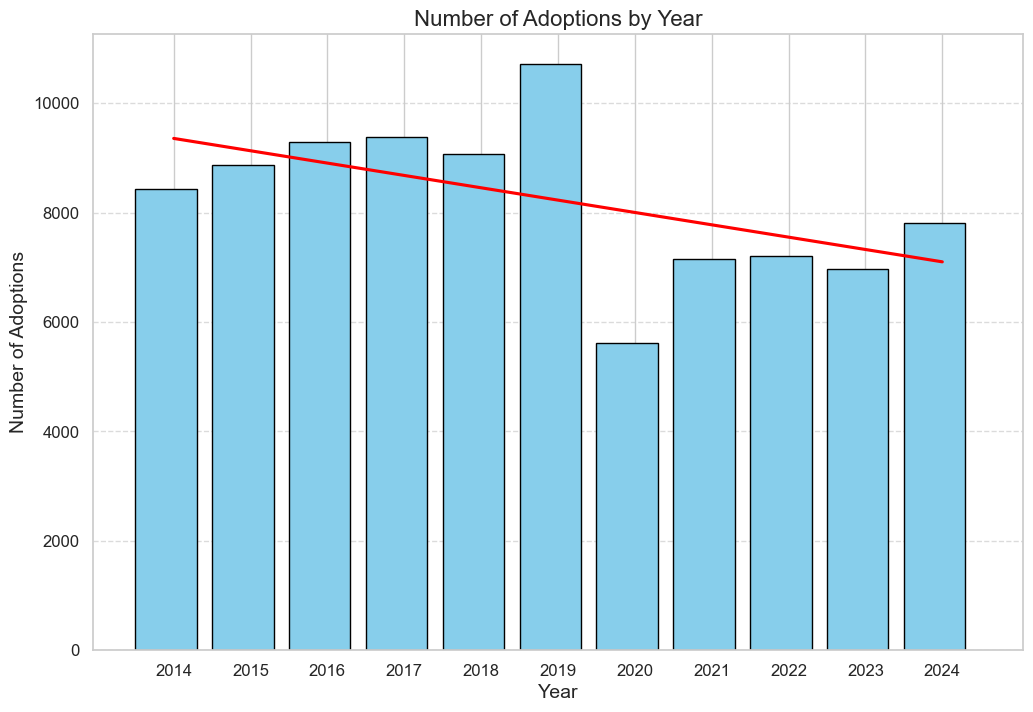

In [300]:
# plotting adoptions by year
# Ensure the Date_of_Outcome column is in datetime format
# Convert the 'Date_of_Outcome' column to datetime
df['Date_of_Outcome'] = pd.to_datetime(df['Date_of_Outcome'])

adoption_types = ['Adoption', 'Return to Owner', 'Rto-Adopt']

# Filter the DataFrame for adoptions (assuming the outcome type is labeled "Adoption")
df_adoptions = df[df['Outcome Type'].isin(adoption_types)].copy()

# Extract the year from the Date_of_Outcome and create a new column
df_adoptions['Year'] = df_adoptions['Date_of_Outcome'].dt.year

# Exclude the years 2013 and 2025
df_adoptions = df_adoptions[(df_adoptions['Year'] != 2013) & (df_adoptions['Year'] != 2025)]

# Set the style and color palette
sns.set(style="whitegrid")

# Create a DataFrame for the histogram data
adoption_counts = df_adoptions['Year'].value_counts().sort_index()
adoption_data = pd.DataFrame({'Year': adoption_counts.index, 'Number of Adoptions': adoption_counts.values})

# Plot a histogram of adoptions by year
plt.figure(figsize=(12, 8))
bins = range(df_adoptions['Year'].min(), df_adoptions['Year'].max() + 2)
plt.hist(df_adoptions['Year'], bins=bins, align='left', edgecolor='black', color='skyblue', width=0.8)

# Add titles and labels with improved font sizes
plt.title("Number of Adoptions by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Adoptions", fontsize=14)

# Set x-ticks with improved font size
plt.xticks(range(df_adoptions['Year'].min(), df_adoptions['Year'].max() + 1), fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a trend line without the confidence interval
sns.regplot(x='Year', y='Number of Adoptions', data=adoption_data, scatter=False, color='red', ci=None)

plt.show()

# Clustering models

In [260]:
df.head()

Animal ID      Date_of_Intake  \
0   A912256 2025-02-27 14:22:00   
1   A921540 2025-02-27 13:46:00   
2   A925674 2025-02-27 13:46:00   
3   A871344 2025-02-27 13:40:00   
4   A853027 2025-02-27 13:04:00   

                                                      Found Location  \
0                                  3414 Hollywood Ave in Austin (TX)   
1                                                        Austin (TX)   
2  Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)   
3                                         1506 E 13Th in Austin (TX)   
4                                                        Austin (TX)   

       Intake Type Intake Condition Sex upon Intake Age upon Intake  \
0  Owner Surrender         Behavior   Neutered Male        7 months   
1  Owner Surrender           Normal   Spayed Female        3 months   
2         Wildlife           Normal         Unknown         2 years   
3    Public Assist          Unknown     Intact Male         3 years   
4  Owner Surrender             Sick   Spayed Female         5 years   

      Date_of_Outcome Date of Birth     Outcome Type animal_type  \
0 2024-09-21 12:11:00    07/04/2024  Return to Owner         Dog   
1 2025-02-05 16:17:00    11/26/2024         Adoption         Dog   
2 2025-02-27 15:20:00    02/27/2023       Euthanasia       Other   
3 2022-12-23 11:47:00    12/22/2021  Return to Owner         Dog   
4 2023-02-23 18:15:00    03/11/2019         Adoption         Dog   

  Sex upon Outcome Age upon Outcome                              breed  \
0    Neutered Male         2 months  Labrador Retriever/Siberian Husky   
1    Spayed Female         2 months             Labrador Retriever Mix   
2          Unknown              NaN                                Bat   
3      Intact Male           1 year                       Pit Bull Mix   
4    Spayed Female          3 years                Pit Bull/Great Dane   

                 color     time_to_outcome  time_to_outcome_minutes  \
0          Cream/White -160 days +21:49:00                -229091.0   
1            White/Tan  -22 days +02:31:00                 -31529.0   
2                Black     0 days 01:34:00                     94.0   
3           Fawn/White -798 days +22:07:00               -1147793.0   
4  Brown Brindle/White -735 days +05:11:00               -1058089.0   

  clean_location  age_days color_group outcome_group breed_type  
0    Austin (TX)    213.08       White      Positive       Pure  
1    Austin (TX)     91.32       White      Positive        Mix  
2    Austin (TX)    730.50       Black      Negative       Pure  
3    Austin (TX)   1095.75       White      Positive        Mix  
4    Austin (TX)   1826.25       White      Positive       Pure

In [261]:
# Dropping columns that are not needed: color, found_location, age_upon_intake, day_of_birth, month_of_birth, day_intake, month_intake
df_clustering = df.drop(columns=['color', 'Found Location', 'Age upon Intake', 'Date of Birth','Outcome Type', 'time_to_outcome','outcome_group','Outcome Type','Animal ID','Age upon Outcome','breed'])

In [264]:
df_clustering.describe()

Date_of_Intake                Date_of_Outcome  \
count                         153686                         153686   
mean   2018-11-21 19:09:03.747511296  2018-12-12 09:31:02.830055680   
min              2013-10-01 07:51:00            2013-10-01 10:39:00   
25%              2016-02-19 11:58:15            2016-03-06 12:11:00   
50%              2018-08-13 13:52:00            2018-09-02 11:03:00   
75%              2021-08-17 11:34:00            2021-09-08 15:56:30   
max              2025-02-27 14:22:00            2025-02-27 16:46:00   
std                              NaN                            NaN   

       time_to_outcome_minutes       age_days  
count             1.536860e+05  153685.000000  
mean              2.966198e+04     692.071304  
min              -5.125241e+06       0.000000  
25%               2.800250e+03      30.440000  
50%               8.577500e+03     365.250000  
75%               2.868000e+04     730.500000  
max               2.754631e+06   10957.500000  
std               7.899968e+04    1026.245937

In [263]:
count = (df['time_to_outcome_minutes'] < 0).sum()
print(count)

722


In [275]:
df_clustering = df_clustering[df_clustering['time_to_outcome_minutes'] >= 0]

In [276]:
# Helper function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Ensure your datetime columns are in datetime format
df_clustering['Date_of_Intake'] = pd.to_datetime(df_clustering['Date_of_Intake'])
df_clustering['Date_of_Outcome'] = pd.to_datetime(df_clustering['Date_of_Outcome'])

# Create season columns from the datetime columns
df_clustering['Intake Season'] = df_clustering['Date_of_Intake'].dt.month.apply(get_season)
df_clustering['Outcome Season'] = df_clustering['Date_of_Outcome'].dt.month.apply(get_season)


## Hierarchical Clustering

In [277]:
df_clustering.head()

Date_of_Intake Intake Type Intake Condition Sex upon Intake  \
2  2025-02-27 13:46:00    Wildlife           Normal         Unknown   
6  2025-02-27 09:32:00    Wildlife             Sick         Unknown   
9  2025-02-26 17:09:00    Wildlife             Sick         Unknown   
10 2025-02-26 15:55:00    Wildlife           Normal         Unknown   
11 2025-02-26 14:33:00       Stray             Sick   Intact Female   

       Date_of_Outcome animal_type Sex upon Outcome  time_to_outcome_minutes  \
2  2025-02-27 15:20:00       Other          Unknown                     94.0   
6  2025-02-27 11:22:00       Other          Unknown                    110.0   
9  2025-02-26 18:22:00       Other          Unknown                     73.0   
10 2025-02-27 11:23:00       Other          Unknown                   1168.0   
11 2025-02-27 15:15:00         Cat    Intact Female                   1482.0   

   clean_location  age_days color_group breed_type Intake Season  \
2     Austin (TX)    730.50       Black       Pure        Winter   
6     Austin (TX)    730.50       Brown       Pure        Winter   
9     Austin (TX)    730.50       Brown       Pure        Winter   
10    Austin (TX)    365.25       Brown       Pure        Winter   
11    Austin (TX)   1461.00       Other       Pure        Winter   

   Outcome Season  
2          Winter  
6          Winter  
9          Winter  
10         Winter  
11         Winter

In [278]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152964 entries, 2 to 153685
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date_of_Intake           152964 non-null  datetime64[ns]
 1   Intake Type              152964 non-null  object        
 2   Intake Condition         152964 non-null  object        
 3   Sex upon Intake          152962 non-null  object        
 4   Date_of_Outcome          152964 non-null  datetime64[ns]
 5   animal_type              152964 non-null  object        
 6   Sex upon Outcome         152962 non-null  object        
 7   time_to_outcome_minutes  152964 non-null  float64       
 8   clean_location           152964 non-null  object        
 9   age_days                 152963 non-null  float64       
 10  color_group              152964 non-null  object        
 11  breed_type               152964 non-null  object        
 12  Intake Season        

In [279]:
# Sample 25,000 rows for clustering
df_sampled = df_clustering.sample(n=25000, random_state=42).reset_index(drop=True)

# Select Features for Clustering
numerical_features = ['time_to_outcome_minutes', 'age_days']
categorical_features = ['animal_type', 'Intake Type', 'Intake Condition', 'color_group', 'breed_type','Sex upon Intake','clean_location','Intake Season','Outcome Season']

# Preprocessing Pipelines
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Apply preprocessing
X_transformed = preprocessor.fit_transform(df_sampled)

# Convert to array for clustering
X_array = X_transformed.toarray()

Silhouette Score for 2 clusters: 0.8762
Silhouette Score for 3 clusters: 0.6249
Silhouette Score for 4 clusters: 0.5947
Silhouette Score for 5 clusters: 0.5887
Silhouette Score for 6 clusters: 0.5887
Silhouette Score for 7 clusters: 0.2769
Silhouette Score for 8 clusters: 0.2663
Silhouette Score for 9 clusters: 0.2662
Silhouette Score for 10 clusters: 0.2384


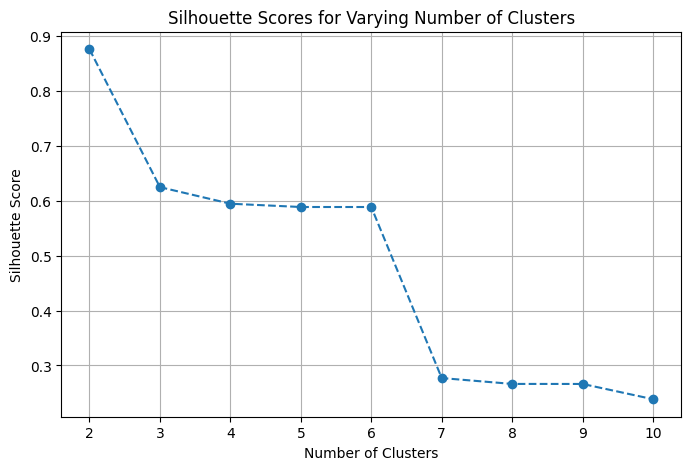

In [280]:
# Assuming X_array has been defined from your preprocessed data
sil_scores = []
cluster_range = range(2, 11)  # Evaluate cluster numbers from 2 to 10

for k in cluster_range:
    agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete') # Can consider complete, ward linkages. Median doesn't work anymore 
    cluster_labels = agg_model.fit_predict(X_array)
    score = silhouette_score(X_array, cluster_labels, metric='euclidean')
    sil_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

# Plot the silhouette scores to visualize the best cluster number
plt.figure(figsize=(8, 5))
plt.plot(list(cluster_range), sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Varying Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(list(cluster_range))
plt.grid(True)
plt.show()


Silhouette Score: 0.21703941371756147
Clustered Data Sample:
       Date_of_Intake      Intake Type Intake Condition Sex upon Intake  \
0 2016-04-10 11:08:00            Stray           Normal   Intact Female   
1 2022-05-15 10:29:00            Stray         Neonatal     Intact Male   
2 2024-11-19 12:21:00            Stray          Injured   Neutered Male   
3 2019-05-18 15:09:00  Owner Surrender           Normal   Spayed Female   
4 2015-09-24 12:50:00            Stray           Normal     Intact Male   

      Date_of_Outcome animal_type Sex upon Outcome  time_to_outcome_minutes  \
0 2016-04-14 18:59:00         Dog    Spayed Female                   6231.0   
1 2022-05-15 15:06:00         Cat      Intact Male                    277.0   
2 2024-11-22 13:51:00         Cat    Neutered Male                   4410.0   
3 2019-06-25 16:02:00         Dog    Spayed Female                  54773.0   
4 2015-10-05 16:33:00         Dog    Neutered Male                  16063.0   

  clean_locat

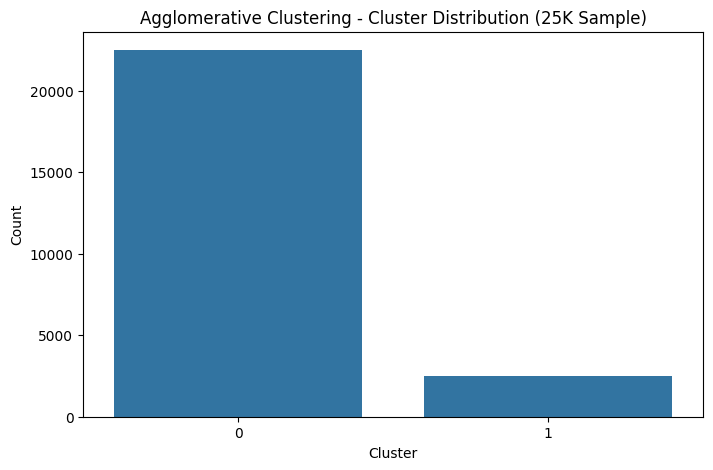

CLUSTER ANALYSIS SUMMARY

📊 CLUSTER 0 PROFILE
Samples: 22503 (90.0% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 414.4 days (-277.7 days younger than average)
⏱️ TIME TO OUTCOME: 21.3 days (0.7 days longer than average)

🐾 ANIMAL TYPES:
  • Dog: 49.5% (1.9% lower than dataset average)
  • Cat: 43.7% (1.3% higher than dataset average)
  • Other: 6.2% (0.5% higher than dataset average)

🏥 INTAKE CONDITIONS:
  • Normal: 84.5% (0.7% higher than dataset average)
  • Injured: 6.2% (0.3% lower than dataset average)
  • Sick: 4.6% (0.3% lower than dataset average)

📥 INTAKE TYPES:
  • Stray: 69.8%
  • Owner Surrender: 19.3%
  • Public Assist: 5.1%

⚤ SEX DISTRIBUTION:
  • Intact Male: 36.1%
  • Intact Female: 35.7%
  • Neutered Male: 10.3%
  • Unknown: 9.3%
  • Spayed Female: 8.6%

🐕 BREED TYPES:
  • Mix: 60.1%
  • Pure: 39.9%

📍 TOP LOCATIONS:
  • Austin (TX): 81.4%
  • Travis (TX): 11.8%
  • Manor (TX): 1.9%

🎨 COLOR DISTRIBUTION:
  • Black: 31.4%


In [285]:
# Compute Distance Matrix (for hierarchical clustering)
distance_matrix = squareform(pdist(X_array, metric='euclidean'))

# Perform Agglomerative Clustering
n_clusters = 2  # Adjust as needed
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df_sampled['agg_cluster'] = agg_clustering.fit_predict(X_array)

# Calculate Silhouette Score
sil_score = silhouette_score(X_array, df_sampled['agg_cluster'], metric='euclidean')
print("Silhouette Score:", sil_score)

# Save clustered dataset to CSV
df_sampled.to_csv("clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("Clustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['agg_cluster'])
plt.title("Agglomerative Clustering - Cluster Distribution (25K Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate overall distributions and metrics for further cluster analysis
overall_animal_dist = df['animal_type'].value_counts(normalize=True) * 100
overall_outcome_dist = df['outcome_group'].value_counts(normalize=True) * 100
overall_intake_dist = df['Intake Condition'].value_counts(normalize=True) * 100
overall_age_mean = df['age_days'].mean()
overall_time_to_outcome = df['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
overall_intake_season_dist = df_clustering['Intake Season'].value_counts(normalize=True) * 100
overall_outcome_season_dist = df_clustering['Outcome Season'].value_counts(normalize=True) * 100

print("CLUSTER ANALYSIS SUMMARY")
print("=" * 50)

for cluster in range(n_clusters):
    cluster_data = df_sampled[df_sampled['agg_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than average"
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Time to outcome analysis
    cluster_time = cluster_data['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
    time_diff = cluster_time - overall_time_to_outcome
    time_diff_text = f"{abs(time_diff):.1f} days {'longer' if time_diff > 0 else 'shorter'} than average"
    print(f"⏱️ TIME TO OUTCOME: {cluster_time:.1f} days ({time_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Outcome analysis with comparison
    if 'outcome_group' in cluster_data.columns:
        cluster_outcome_dist = cluster_data['outcome_group'].value_counts(normalize=True) * 100
        print("\n🏁 OUTCOMES:")
        for outcome, pct in cluster_outcome_dist.head(3).items():
            overall_pct = overall_outcome_dist.get(outcome, 0)
            diff = pct - overall_pct
            diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
            print(f"  • {outcome}: {pct:.1f}% ({diff_text})")
    
    # Intake condition with comparison
    cluster_intake_dist = cluster_data['Intake Condition'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Intake type analysis
    intake_dist = cluster_data['Intake Type'].value_counts(normalize=True) * 100
    print("\n📥 INTAKE TYPES:")
    for intake, pct in intake_dist.head(3).items():
        print(f"  • {intake}: {pct:.1f}%")
    
    # Sex distribution 
    sex_dist = cluster_data['Sex upon Intake'].value_counts(normalize=True) * 100
    print("\n⚤ SEX DISTRIBUTION:")
    for sex, pct in sex_dist.items():
        print(f"  • {sex}: {pct:.1f}%")
    
    # Breed type analysis
    breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in breed_dist.head(3).items():
        print(f"  • {breed}: {pct:.1f}%")
    
    # Location analysis
    top_locations = cluster_data['clean_location'].value_counts(normalize=True).head(3) * 100
    print("\n📍 TOP LOCATIONS:")
    for location, pct in top_locations.items():
        print(f"  • {location}: {pct:.1f}%")
    
    # Color analysis
    color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in color_dist.head(3).items():
        print(f"  • {color}: {pct:.1f}%")
    
    # Seasonality analysis - Intake
    intake_season_dist = cluster_data['Intake Season'].value_counts(normalize=True) * 100
    print("\n🌡️ INTAKE SEASON:")
    for season, pct in intake_season_dist.items():
        overall_pct = overall_intake_season_dist.get(season, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than average"
        print(f"  • {season}: {pct:.1f}% ({diff_text})")
    
    # Seasonality analysis - Outcome
    if 'Outcome Season' in cluster_data.columns:
        outcome_season_dist = cluster_data['Outcome Season'].value_counts(normalize=True) * 100
        print("\n🌡️ OUTCOME SEASON:")
        for season, pct in outcome_season_dist.items():
            overall_pct = overall_outcome_season_dist.get(season, 0)
            diff = pct - overall_pct
            diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than average"
            print(f"  • {season}: {pct:.1f}% ({diff_text})")
    
    # Cluster summary insights
    print("\n🔑 KEY INSIGHTS:")
    distinctive_features = []
    
    # Check animal types
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0)) 
                   for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:  # Only if >5% difference
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check outcomes
    if 'outcome_group' in cluster_data.columns:
        outcome_diffs = [(outcome, pct - overall_outcome_dist.get(outcome, 0)) 
                        for outcome, pct in cluster_outcome_dist.items()]
        outcome_diffs.sort(key=lambda x: x[1], reverse=True)
        if outcome_diffs and outcome_diffs[0][1] > 5:
            distinctive_features.append(f"More likely to have {outcome_diffs[0][0]} outcome")
    
    # Age distinctive?
    if abs(age_diff) > (overall_age_mean * 0.2):  # If >20% different from mean
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # Time to outcome distinctive?
    if abs(time_diff) > (overall_time_to_outcome * 0.2):  # If >20% different
        distinctive_features.append(f"{'Longer' if time_diff > 0 else 'Shorter'} shelter stays")
    
    # Check seasonal patterns
    intake_season_diffs = [(season, pct - overall_intake_season_dist.get(season, 0)) 
                          for season, pct in intake_season_dist.items()]
    intake_season_diffs.sort(key=lambda x: x[1], reverse=True)
    if intake_season_diffs and intake_season_diffs[0][1] > 5:
        distinctive_features.append(f"More common in {intake_season_diffs[0][0]} season")
    
    # Print key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Recommended actions based on cluster insights
    print("\n📋 RECOMMENDED ACTIONS:")
    if 'outcome_group' in cluster_data.columns:
        if "adoption" in str(outcome_diffs[:2]).lower():
            print("  • Analyze successful adoption factors in this cluster")
        elif "transfer" in str(outcome_diffs[:2]).lower():
            print("  • Review transfer partner relationships for these animals")
        elif "euthanasia" in str(outcome_diffs[:2]).lower():
            print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider special programs for older animals in this group")
    
    if time_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    # Seasonal recommendations
    if intake_season_diffs and intake_season_diffs[0][1] > 10:  # If strong seasonal pattern
        print(f"  • Plan resources for {intake_season_diffs[0][0]} seasonal influx")
    
    print("=" * 50)

Silhouette Score: 0.2294576851859794
Clustered Data Sample:
       Date_of_Intake      Intake Type Intake Condition Sex upon Intake  \
0 2016-04-10 11:08:00            Stray           Normal   Intact Female   
1 2022-05-15 10:29:00            Stray         Neonatal     Intact Male   
2 2024-11-19 12:21:00            Stray          Injured   Neutered Male   
3 2019-05-18 15:09:00  Owner Surrender           Normal   Spayed Female   
4 2015-09-24 12:50:00            Stray           Normal     Intact Male   

      Date_of_Outcome animal_type Sex upon Outcome  time_to_outcome_minutes  \
0 2016-04-14 18:59:00         Dog    Spayed Female                   6231.0   
1 2022-05-15 15:06:00         Cat      Intact Male                    277.0   
2 2024-11-22 13:51:00         Cat    Neutered Male                   4410.0   
3 2019-06-25 16:02:00         Dog    Spayed Female                  54773.0   
4 2015-10-05 16:33:00         Dog    Neutered Male                  16063.0   

  clean_locati

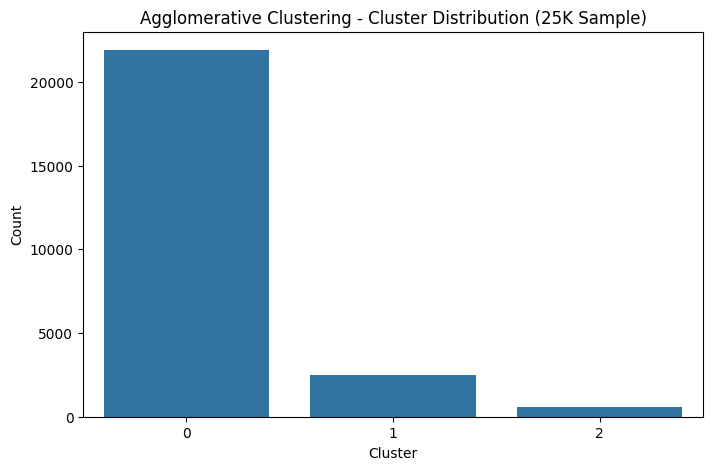

CLUSTER ANALYSIS SUMMARY

📊 CLUSTER 0 PROFILE
Samples: 21908 (87.6% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 400.4 days (-291.6 days younger than average)
⏱️ TIME TO OUTCOME: 15.4 days (5.2 days shorter than average)

🐾 ANIMAL TYPES:
  • Dog: 49.2% (2.2% lower than dataset average)
  • Cat: 43.9% (1.5% higher than dataset average)
  • Other: 6.3% (0.6% higher than dataset average)

🏥 INTAKE CONDITIONS:
  • Normal: 84.6% (0.8% higher than dataset average)
  • Injured: 6.1% (0.4% lower than dataset average)
  • Sick: 4.6% (0.3% lower than dataset average)

📥 INTAKE TYPES:
  • Stray: 70.1%
  • Owner Surrender: 18.9%
  • Public Assist: 5.1%

⚤ SEX DISTRIBUTION:
  • Intact Male: 36.2%
  • Intact Female: 35.8%
  • Neutered Male: 10.0%
  • Unknown: 9.5%
  • Spayed Female: 8.5%

🐕 BREED TYPES:
  • Mix: 60.0%
  • Pure: 40.0%

📍 TOP LOCATIONS:
  • Austin (TX): 81.4%
  • Travis (TX): 11.8%
  • Manor (TX): 1.9%

🎨 COLOR DISTRIBUTION:
  • Black: 31.4%

In [286]:
# Compute Distance Matrix (for hierarchical clustering)
distance_matrix = squareform(pdist(X_array, metric='euclidean'))

# Perform Agglomerative Clustering
n_clusters = 3  # Adjust as needed
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df_sampled['agg_cluster'] = agg_clustering.fit_predict(X_array)

# Calculate Silhouette Score
sil_score = silhouette_score(X_array, df_sampled['agg_cluster'], metric='euclidean')
print("Silhouette Score:", sil_score)

# Save clustered dataset to CSV
df_sampled.to_csv("clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("Clustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['agg_cluster'])
plt.title("Agglomerative Clustering - Cluster Distribution (25K Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate overall distributions and metrics for further cluster analysis
overall_animal_dist = df['animal_type'].value_counts(normalize=True) * 100
overall_outcome_dist = df['outcome_group'].value_counts(normalize=True) * 100
overall_intake_dist = df['Intake Condition'].value_counts(normalize=True) * 100
overall_age_mean = df['age_days'].mean()
overall_time_to_outcome = df['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
overall_intake_season_dist = df_clustering['Intake Season'].value_counts(normalize=True) * 100
overall_outcome_season_dist = df_clustering['Outcome Season'].value_counts(normalize=True) * 100

print("CLUSTER ANALYSIS SUMMARY")
print("=" * 50)

for cluster in range(n_clusters):
    cluster_data = df_sampled[df_sampled['agg_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than average"
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Time to outcome analysis
    cluster_time = cluster_data['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
    time_diff = cluster_time - overall_time_to_outcome
    time_diff_text = f"{abs(time_diff):.1f} days {'longer' if time_diff > 0 else 'shorter'} than average"
    print(f"⏱️ TIME TO OUTCOME: {cluster_time:.1f} days ({time_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Outcome analysis with comparison
    if 'outcome_group' in cluster_data.columns:
        cluster_outcome_dist = cluster_data['outcome_group'].value_counts(normalize=True) * 100
        print("\n🏁 OUTCOMES:")
        for outcome, pct in cluster_outcome_dist.head(3).items():
            overall_pct = overall_outcome_dist.get(outcome, 0)
            diff = pct - overall_pct
            diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
            print(f"  • {outcome}: {pct:.1f}% ({diff_text})")
    
    # Intake condition with comparison
    cluster_intake_dist = cluster_data['Intake Condition'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Intake type analysis
    intake_dist = cluster_data['Intake Type'].value_counts(normalize=True) * 100
    print("\n📥 INTAKE TYPES:")
    for intake, pct in intake_dist.head(3).items():
        print(f"  • {intake}: {pct:.1f}%")
    
    # Sex distribution 
    sex_dist = cluster_data['Sex upon Intake'].value_counts(normalize=True) * 100
    print("\n⚤ SEX DISTRIBUTION:")
    for sex, pct in sex_dist.items():
        print(f"  • {sex}: {pct:.1f}%")
    
    # Breed type analysis
    breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in breed_dist.head(3).items():
        print(f"  • {breed}: {pct:.1f}%")
    
    # Location analysis
    top_locations = cluster_data['clean_location'].value_counts(normalize=True).head(3) * 100
    print("\n📍 TOP LOCATIONS:")
    for location, pct in top_locations.items():
        print(f"  • {location}: {pct:.1f}%")
    
    # Color analysis
    color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in color_dist.head(3).items():
        print(f"  • {color}: {pct:.1f}%")
    
    # Seasonality analysis - Intake
    intake_season_dist = cluster_data['Intake Season'].value_counts(normalize=True) * 100
    print("\n🌡️ INTAKE SEASON:")
    for season, pct in intake_season_dist.items():
        overall_pct = overall_intake_season_dist.get(season, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than average"
        print(f"  • {season}: {pct:.1f}% ({diff_text})")
    
    # Seasonality analysis - Outcome
    if 'Outcome Season' in cluster_data.columns:
        outcome_season_dist = cluster_data['Outcome Season'].value_counts(normalize=True) * 100
        print("\n🌡️ OUTCOME SEASON:")
        for season, pct in outcome_season_dist.items():
            overall_pct = overall_outcome_season_dist.get(season, 0)
            diff = pct - overall_pct
            diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than average"
            print(f"  • {season}: {pct:.1f}% ({diff_text})")
    
    # Cluster summary insights
    print("\n🔑 KEY INSIGHTS:")
    distinctive_features = []
    
    # Check animal types
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0)) 
                   for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:  # Only if >5% difference
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check outcomes
    if 'outcome_group' in cluster_data.columns:
        outcome_diffs = [(outcome, pct - overall_outcome_dist.get(outcome, 0)) 
                        for outcome, pct in cluster_outcome_dist.items()]
        outcome_diffs.sort(key=lambda x: x[1], reverse=True)
        if outcome_diffs and outcome_diffs[0][1] > 5:
            distinctive_features.append(f"More likely to have {outcome_diffs[0][0]} outcome")
    
    # Age distinctive?
    if abs(age_diff) > (overall_age_mean * 0.2):  # If >20% different from mean
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # Time to outcome distinctive?
    if abs(time_diff) > (overall_time_to_outcome * 0.2):  # If >20% different
        distinctive_features.append(f"{'Longer' if time_diff > 0 else 'Shorter'} shelter stays")
    
    # Check seasonal patterns
    intake_season_diffs = [(season, pct - overall_intake_season_dist.get(season, 0)) 
                          for season, pct in intake_season_dist.items()]
    intake_season_diffs.sort(key=lambda x: x[1], reverse=True)
    if intake_season_diffs and intake_season_diffs[0][1] > 5:
        distinctive_features.append(f"More common in {intake_season_diffs[0][0]} season")
    
    # Print key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Recommended actions based on cluster insights
    print("\n📋 RECOMMENDED ACTIONS:")
    if 'outcome_group' in cluster_data.columns:
        if "adoption" in str(outcome_diffs[:2]).lower():
            print("  • Analyze successful adoption factors in this cluster")
        elif "transfer" in str(outcome_diffs[:2]).lower():
            print("  • Review transfer partner relationships for these animals")
        elif "euthanasia" in str(outcome_diffs[:2]).lower():
            print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider special programs for older animals in this group")
    
    if time_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    # Seasonal recommendations
    if intake_season_diffs and intake_season_diffs[0][1] > 10:  # If strong seasonal pattern
        print(f"  • Plan resources for {intake_season_diffs[0][0]} seasonal influx")
    
    print("=" * 50)

## Gaussian Mixtures Model

Silhouette Score for 2 components: 0.0411
Silhouette Score for 3 components: 0.0369
Silhouette Score for 4 components: 0.0609
Silhouette Score for 5 components: -0.0134
Silhouette Score for 6 components: 0.0224
Silhouette Score for 7 components: 0.0168
Silhouette Score for 8 components: 0.0219
Silhouette Score for 9 components: 0.0171
Silhouette Score for 10 components: 0.0068


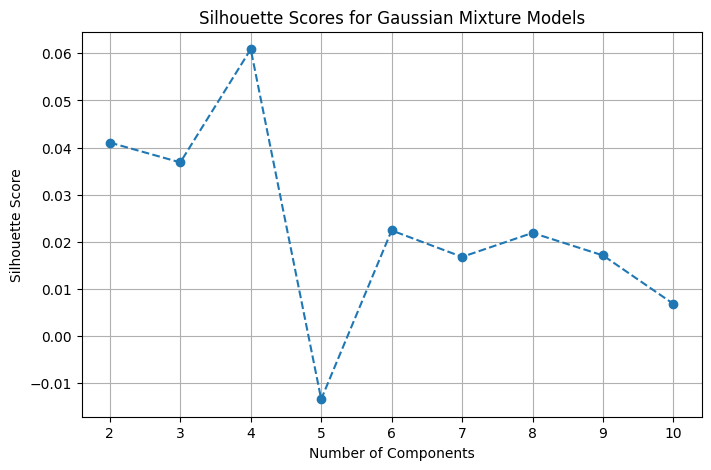

In [281]:
sil_scores = []
cluster_range = range(2, 11)  # Testing components from 2 to 10

for k in cluster_range:
    gm = GaussianMixture(n_components=k, n_init=10, random_state=42)
    gm.fit(X_array)
    cluster_labels = gm.predict(X_array)
    score = silhouette_score(X_array, cluster_labels, metric='euclidean')
    sil_scores.append(score)
    print(f"Silhouette Score for {k} components: {score:.4f}")

# Plot the silhouette scores to help determine the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(list(cluster_range), sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Gaussian Mixture Models")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.xticks(list(cluster_range))
plt.grid(True)
plt.show()

Cluster Weights:
 [0.07245163 0.44745941 0.20042236 0.27966661]

Cluster Means:
 [[-1.06184199e-01 -2.60574683e-01  5.26788265e-02  1.89321722e-01
   1.01239409e-01  3.45057816e-03  6.53309465e-01  5.29088651e-02
   2.07034689e-03  5.40591168e-02  4.48575160e-02  2.84350031e-01
   5.61754124e-01  0.00000000e+00  6.90115632e-04  4.37073233e-03
   1.44924283e-02  1.31352009e-01  5.75096360e-03  1.61026981e-03
   1.61026981e-03  1.16407723e-01  1.15019272e-03  4.35002886e-01
   1.04911806e-01  1.84030835e-03  6.90115632e-04  1.08118116e-02
   1.65857790e-01  4.60077088e-04  2.99050107e-03  3.28725079e-01
   3.49198510e-01  2.87548180e-02  6.94716402e-02  1.61026981e-03
   3.68061670e-02  4.18670150e-02  1.81954949e-02  1.25371006e-01
   6.33986227e-01  3.17913268e-01  2.53042398e-03  4.55700816e-02
   3.54511846e-01  6.45488154e-01]
 [ 4.50415231e-03 -7.12292606e-02  0.00000000e+00  4.86339203e-01
   5.03790255e-01  0.00000000e+00  9.87054159e-03  0.00000000e+00
   0.00000000e+00  2.08440

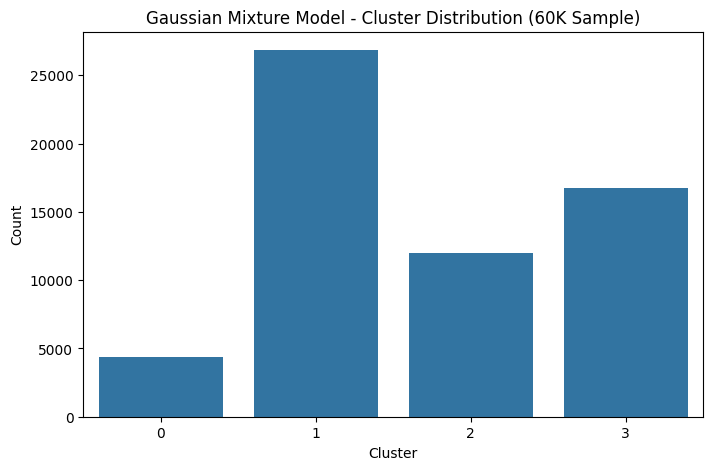

GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS

📊 GMM CLUSTER 0 PROFILE
Samples: 4347 (7.2% of total)
Average assignment probability: 100.0%
--------------------------------------------------
📅 AGE PROFILE: Average age: 415.4 days (-262.7 days younger than average)
⏱️ TIME TO OUTCOME: 5.9 days (14.6 days shorter than average)

🐾 ANIMAL TYPES:
  • Other: 65.3% (59.6% higher than dataset average)
  • Cat: 18.9% (23.4% lower than dataset average)
  • Dog: 10.1% (41.2% lower than dataset average)

🏁 OUTCOMES:
  • Negative: 63.4% (55.0% higher than dataset average)
  • Neutral: 31.8% (1.8% higher than dataset average)
  • Positive: 4.6% (56.9% lower than dataset average)

🏥 INTAKE CONDITIONS:
  • Normal: 43.5% (40.3% lower than dataset average)
  • Sick: 16.6% (11.7% higher than dataset average)
  • Injured: 13.1% (6.7% higher than dataset average)

📥 INTAKE TYPES:
  • Wildlife: 56.2%
  • Stray: 28.4%
  • Owner Surrender: 5.4%

⚤ SEX DISTRIBUTION:
  • Unknown: 67.5%
  • Intact Male: 15.8%
  • Inta

In [ ]:
# Randomly sample 50,000 rows to reduce computational load
df_sampled = df_clustering.sample(n=60000, random_state=42).reset_index(drop=True)

# Select Features for Clustering
numerical_features = ['time_to_outcome_minutes', 'age_days']
categorical_features = ['animal_type', 'Intake Type', 'Intake Condition', 'color_group', 'outcome_group', 'breed_type']

# Preprocessing Pipelines
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Apply preprocessing
X_transformed = preprocessor.fit_transform(df_sampled)
X_array = X_transformed.toarray()

# Perform Gaussian Mixture Clustering
n_components = 4  # Number of clusters
gm = GaussianMixture(n_components=n_components, n_init=10, random_state=42)
gm.fit(X_array)

# Extract Model Parameters
print("Cluster Weights:\n", gm.weights_)
print("\nCluster Means:\n", gm.means_)
print("\nCovariances:\n", gm.covariances_)
print("\nDid the model converge?:", gm.converged_)
print("Number of iterations:", gm.n_iter_)

# Assign Hard Clustering Labels
df_sampled['gmm_cluster'] = gm.predict(X_array)

# Assign Soft Clustering Probabilities
soft_clusters = gm.predict_proba(X_array)
df_sampled['gmm_soft_cluster'] = soft_clusters.max(axis=1)  # Assigns the highest probability per row

# Generate New Synthetic Samples
X_new, y_new = gm.sample(7)
print("\nGenerated Samples:\n", X_new)
print("\nGenerated Sample Labels:\n", y_new)

# Estimate Density at Given Points
density_scores = gm.score_samples(X_array)
df_sampled['density_score'] = density_scores

# Save clustered dataset
df_sampled.to_csv("gmm_clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("\nClustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['gmm_cluster'])
plt.title("Gaussian Mixture Model - Cluster Distribution (60K Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate cluster insights with percentages and comparisons to overall distribution
overall_animal_dist = df['animal_type'].value_counts(normalize=True) * 100
overall_outcome_dist = df['outcome_group'].value_counts(normalize=True) * 100
overall_intake_dist = df['Intake Condition'].value_counts(normalize=True) * 100
overall_age_mean = df['age_days'].mean()
overall_time_to_outcome = df['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days

print("GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS")
print("=" * 50)

for cluster in range(n_components):
    cluster_data = df_sampled[df_sampled['gmm_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    avg_prob = cluster_data['gmm_soft_cluster'].mean() * 100
    
    print(f"\n📊 GMM CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print(f"Average assignment probability: {avg_prob:.1f}%")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than average"
    
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Time to outcome analysis
    cluster_time = cluster_data['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
    time_diff = cluster_time - overall_time_to_outcome
    time_diff_text = f"{abs(time_diff):.1f} days {'longer' if time_diff > 0 else 'shorter'} than average"
    print(f"⏱️ TIME TO OUTCOME: {cluster_time:.1f} days ({time_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Outcome analysis with comparison
    cluster_outcome_dist = cluster_data['outcome_group'].value_counts(normalize=True) * 100
    print("\n🏁 OUTCOMES:")
    for outcome, pct in cluster_outcome_dist.head(3).items():
        overall_pct = overall_outcome_dist.get(outcome, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {outcome}: {pct:.1f}% ({diff_text})")
    
    # Intake condition with comparison
    cluster_intake_dist = cluster_data['Intake Condition'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Intake type analysis
    intake_dist = cluster_data['Intake Type'].value_counts(normalize=True) * 100
    print("\n📥 INTAKE TYPES:")
    for intake, pct in intake_dist.head(3).items():
        print(f"  • {intake}: {pct:.1f}%")
    
    # Sex distribution
    if 'Sex upon Intake' in cluster_data.columns:
        sex_dist = cluster_data['Sex upon Intake'].value_counts(normalize=True) * 100
        print("\n⚤ SEX DISTRIBUTION:")
        for sex, pct in sex_dist.items():
            print(f"  • {sex}: {pct:.1f}%")
    
    # Breed type analysis
    breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in breed_dist.head(3).items():
        print(f"  • {breed}: {pct:.1f}%")
    
    # Location analysis
    if 'clean_location' in cluster_data.columns:
        top_locations = cluster_data['clean_location'].value_counts(normalize=True).head(3) * 100
        print("\n📍 TOP LOCATIONS:")
        for location, pct in top_locations.items():
            print(f"  • {location}: {pct:.1f}%")
    
    # Color analysis
    color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in color_dist.head(3).items():
        print(f"  • {color}: {pct:.1f}%")
    
    # Density score analysis
    avg_density = cluster_data['density_score'].mean()
    print(f"\n📉 DENSITY SCORE: {avg_density:.2f}")
    
    # Cluster summary
    print("\n🔑 KEY INSIGHTS:")
    # Find distinctive features (highest positive differences from overall)
    distinctive_features = []
    
    # Check animal types
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0)) 
                   for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:  # Only if >5% difference
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check outcomes
    outcome_diffs = [(outcome, pct - overall_outcome_dist.get(outcome, 0)) 
                    for outcome, pct in cluster_outcome_dist.items()]
    outcome_diffs.sort(key=lambda x: x[1], reverse=True)
    if outcome_diffs and outcome_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {outcome_diffs[0][0]} outcome")
    
    # Age distinctive?
    if abs(age_diff) > (overall_age_mean * 0.2):  # If >20% different from mean
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # Time to outcome distinctive?
    if abs(time_diff) > (overall_time_to_outcome * 0.2):  # If >20% different
        distinctive_features.append(f"{'Longer' if time_diff > 0 else 'Shorter'} shelter stays")
    
    # Print key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Suggested actions
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(outcome_diffs[:2]).lower():
        print("  • Analyze successful adoption factors in this cluster")
    elif "transfer" in str(outcome_diffs[:2]).lower():
        print("  • Review transfer partner relationships for these animals")
    elif "euthanasia" in str(outcome_diffs[:2]).lower():
        print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider special programs for older animals in this group")
    
    if time_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    print("=" * 50)

## Affinity propagation

In [282]:
# Define a list of damping values to test
damping_values = [0.5, 0.6, 0.7, 0.8, 0.9]
sil_scores = []
n_clusters_list = []

for damping in damping_values:
    # Instantiate Affinity Propagation with the given damping
    aff_prop = AffinityPropagation(damping=damping, random_state=42)
    cluster_labels = aff_prop.fit_predict(X_array)
    n_clusters = len(np.unique(cluster_labels))
    n_clusters_list.append(n_clusters)
    
    # Check if more than one cluster is found (silhouette score requires >=2 clusters)
    if n_clusters > 1:
        score = silhouette_score(X_array, cluster_labels, metric='euclidean')
    else:
        score = -1  # Undefined silhouette score if only one cluster exists
    sil_scores.append(score)
    print(f"Damping: {damping}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Plot the silhouette scores for different damping values
plt.figure(figsize=(8, 5))
plt.plot(damping_values, sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Affinity Propagation with Varying Damping")
plt.xlabel("Damping")
plt.ylabel("Silhouette Score")
plt.xticks(damping_values)
plt.grid(True)
plt.show()

KeyboardInterrupt: 


✅ Affinity Propagation found 276 clusters.

Clustered Data Sample:
  Animal ID      Date_of_Intake Intake Type Intake Condition Sex upon Intake  \
0   A824437 2020-10-14 14:28:00       Stray           Normal   Intact Female   
1   A515453 2017-08-07 14:23:00       Stray           Normal   Neutered Male   
2   A772170 2018-05-15 15:12:00       Stray           Normal   Spayed Female   
3   A819709 2020-07-04 13:34:00       Stray           Normal   Intact Female   
4   A716634 2015-11-22 13:06:00       Stray           Normal   Intact Female   

      Date_of_Outcome animal_type Sex upon Outcome Age upon Outcome  \
0 2020-10-21 18:39:00         Dog    Spayed Female           1 year   
1 2017-08-07 17:12:00         Dog    Neutered Male         10 years   
2 2018-05-16 17:05:00         Dog    Spayed Female           1 year   
3 2020-07-04 07:37:00         Cat    Intact Female          2 weeks   
4 2015-12-19 18:44:00         Cat    Intact Female         2 months   

                        

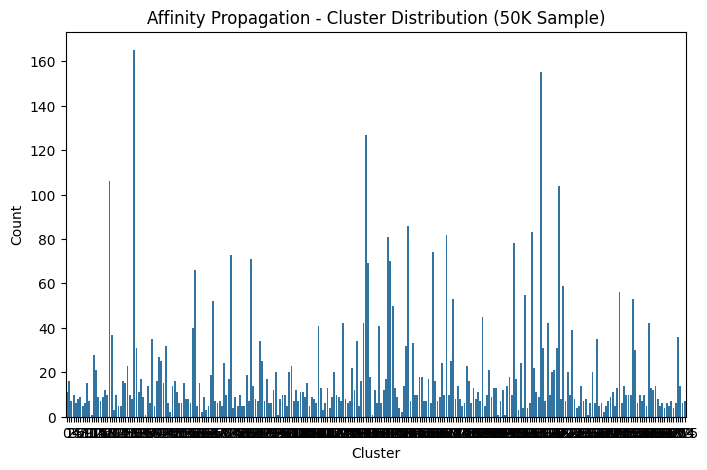

AFFINITY PROPAGATION CLUSTER ANALYSIS
Analysis of top 5 clusters out of 276 total clusters

📊 AFFINITY CLUSTER 30 PROFILE
Samples: 165 (3.3% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 213.0 days (-465.0 days younger than average)
⏱️ TIME TO OUTCOME: 12.6 days (7.9 days shorter than average)

🐾 ANIMAL TYPES:
  • Dog: 98.8% (47.4% higher than dataset average)
  • Bird: 1.2% (0.6% higher than dataset average)

🏁 OUTCOMES:
  • Positive: 100.0% (38.5% higher than dataset average)

🏥 INTAKE CONDITIONS:
  • Normal: 100.0% (16.2% higher than dataset average)

📥 INTAKE TYPES:
  • Stray: 100.0%

⚤ SEX DISTRIBUTION:
  • Intact Male: 47.3%
  • Intact Female: 41.2%
  • Spayed Female: 5.5%
  • Neutered Male: 4.8%
  • Unknown: 1.2%

🐕 BREED TYPES:
  • Mix: 100.0%

📍 TOP LOCATIONS:
  • Austin (TX): 82.4%
  • Travis (TX): 13.3%
  • Manor (TX): 2.4%

🎨 COLOR DISTRIBUTION:
  • White: 98.8%
  • Other: 1.2%

🔑 KEY INSIGHTS:
  • High proportion of Dog
  • More l

In [ ]:
# Perform Affinity Propagation Clustering
affinity_propagation = AffinityPropagation(damping=0.9, random_state=42)
df_sampled['affinity_cluster'] = affinity_propagation.fit_predict(X_array)

# Extract the number of clusters dynamically
num_clusters = len(np.unique(df_sampled['affinity_cluster']))
print(f"\n✅ Affinity Propagation found {num_clusters} clusters.")

# Save clustered dataset
df_sampled.to_csv("affinity_propagation_clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("\nClustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['affinity_cluster'])
plt.title("Affinity Propagation - Cluster Distribution (50K Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate cluster insights with percentages and comparisons to overall distribution
overall_animal_dist = df['animal_type'].value_counts(normalize=True) * 100
overall_outcome_dist = df['outcome_group'].value_counts(normalize=True) * 100
overall_intake_dist = df['Intake Condition'].value_counts(normalize=True) * 100
overall_age_mean = df['age_days'].mean()
overall_time_to_outcome = df['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days

print("AFFINITY PROPAGATION CLUSTER ANALYSIS")
print("=" * 50)

# Get the unique clusters from the data
unique_clusters = df_sampled['affinity_cluster'].unique()

# Sort clusters by size (descending)
cluster_sizes = df_sampled['affinity_cluster'].value_counts().sort_values(ascending=False)
top_clusters = cluster_sizes.index[:min(5, len(cluster_sizes))]  # Get top 5 or fewer

print(f"Analysis of top {len(top_clusters)} clusters out of {len(unique_clusters)} total clusters")
print("=" * 50)

for cluster in top_clusters:
    cluster_data = df_sampled[df_sampled['affinity_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 AFFINITY CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than average"
    
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Time to outcome analysis
    cluster_time = cluster_data['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
    time_diff = cluster_time - overall_time_to_outcome
    time_diff_text = f"{abs(time_diff):.1f} days {'longer' if time_diff > 0 else 'shorter'} than average"
    print(f"⏱️ TIME TO OUTCOME: {cluster_time:.1f} days ({time_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Outcome analysis with comparison
    cluster_outcome_dist = cluster_data['outcome_group'].value_counts(normalize=True) * 100
    print("\n🏁 OUTCOMES:")
    for outcome, pct in cluster_outcome_dist.head(3).items():
        overall_pct = overall_outcome_dist.get(outcome, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {outcome}: {pct:.1f}% ({diff_text})")
    
    # Intake condition with comparison
    cluster_intake_dist = cluster_data['Intake Condition'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Intake type analysis
    intake_dist = cluster_data['Intake Type'].value_counts(normalize=True) * 100
    print("\n📥 INTAKE TYPES:")
    for intake, pct in intake_dist.head(3).items():
        print(f"  • {intake}: {pct:.1f}%")
    
    # Sex distribution
    if 'Sex upon Intake' in cluster_data.columns:
        sex_dist = cluster_data['Sex upon Intake'].value_counts(normalize=True) * 100
        print("\n⚤ SEX DISTRIBUTION:")
        for sex, pct in sex_dist.items():
            print(f"  • {sex}: {pct:.1f}%")
    
    # Breed type analysis
    breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in breed_dist.head(3).items():
        print(f"  • {breed}: {pct:.1f}%")
    
    # Location analysis
    if 'clean_location' in cluster_data.columns:
        top_locations = cluster_data['clean_location'].value_counts(normalize=True).head(3) * 100
        print("\n📍 TOP LOCATIONS:")
        for location, pct in top_locations.items():
            print(f"  • {location}: {pct:.1f}%")
    
    # Color analysis
    color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in color_dist.head(3).items():
        print(f"  • {color}: {pct:.1f}%")
    
    # Cluster summary
    print("\n🔑 KEY INSIGHTS:")
    # Find distinctive features (highest positive differences from overall)
    distinctive_features = []
    
    # Check animal types
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0)) 
                   for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:  # Only if >5% difference
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check outcomes
    outcome_diffs = [(outcome, pct - overall_outcome_dist.get(outcome, 0)) 
                    for outcome, pct in cluster_outcome_dist.items()]
    outcome_diffs.sort(key=lambda x: x[1], reverse=True)
    if outcome_diffs and outcome_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {outcome_diffs[0][0]} outcome")
    
    # Age distinctive?
    if abs(age_diff) > (overall_age_mean * 0.2):  # If >20% different from mean
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # Time to outcome distinctive?
    if abs(time_diff) > (overall_time_to_outcome * 0.2):  # If >20% different
        distinctive_features.append(f"{'Longer' if time_diff > 0 else 'Shorter'} shelter stays")
    
    # Print key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Suggested actions
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(outcome_diffs[:2]).lower():
        print("  • Analyze successful adoption factors in this cluster")
    elif "transfer" in str(outcome_diffs[:2]).lower():
        print("  • Review transfer partner relationships for these animals")
    elif "euthanasia" in str(outcome_diffs[:2]).lower():
        print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider special programs for older animals in this group")
    
    if time_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    print("=" * 50)

# Show cluster distribution table with percentages
cluster_distribution = df_sampled['affinity_cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Count']
cluster_distribution['Percentage'] = cluster_distribution['Count'] / len(df_sampled) * 100

print("\nCLUSTER SIZE DISTRIBUTION")
print("-" * 25)
print(f"Top 5 clusters (out of {len(unique_clusters)} total):")
for _, row in cluster_distribution.head(5).iterrows():
    print(f"Cluster {row['Cluster']}: {row['Count']} samples ({row['Percentage']:.1f}%)")

# Calculate how many samples are in the "other" clusters
other_samples = cluster_distribution.iloc[5:]['Count'].sum() if len(cluster_distribution) > 5 else 0
other_percentage = other_samples / len(df_sampled) * 100 if len(df_sampled) > 0 else 0
print(f"Other {len(unique_clusters) - 5} clusters: {other_samples} samples ({other_percentage:.1f}%)")